In [1]:

import matplotlib as plt
import pandas as pd
import pathlib
from fastai.tabular.all import *
%load_ext autoreload
%autoreload 2

/home/timmy/miniconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607369981906/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [18]:
dir_path = pathlib.Path('train/')
csv_path = dir_path.joinpath('*.csv')


all_files = glob.glob(csv_path.as_posix())
df=None
for f in all_files:
    if  df is None:
        df = pd.read_csv(f)
    else:
        df = pd.concat([df,pd.read_csv(f)])
# df = df.drop(['market cap','volume','operating cash flow'],axis=1)

In [19]:
df.head()

,Stock_code,market_cap,price_per_sale,current_price,price_per_book,return_on_assets,return_on_equity,revenue_per_share,quarterly_revenue_growth,total_cash_per_share,...,book_value_per_dollar,earnings_per_dollar,revenue_per_dollar,price_to_free_cash_flow,sp_52_week_change,stock_52_week_change,FCF_yield,EV_/_FCF,missing,trend_sp
0,A,13190000,2.39,32.27,3.55,13.20,34.26,12.408,17.0,5.503,...,117411598,86877744,157139802,1.777626e+01,8.85,-1.55,5.837931e-02,1.712936e+01,0,True
1,AA,24060000,0.84,27.75,1.67,6.14,13.22,32.673,18.9,0.523,...,516197850,66539664,1020680971,-1.432151e+02,8.85,15.24,-5.407113e-03,-1.849416e+02,0,True
2,AAA,7650000,1.65,56.29,2.85,13.33,23.16,34.300,21.5,5.338,...,47879260,10290900,82858660,7.650000e+06,8.85,1.65,1.349528e-07,7.410000e+06,0,False
3,AAC,17470,2.59,0.28,1.27,-1.84,5.84,0.104,193.7,0.031,...,47476178,2228928,23180857,-5.199405e+01,8.85,-20.59,-2.250502e-02,-4.443452e+01,2,False
4,AACC,595520,2.32,16.00,2.12,13.73,17.76,6.754,-3.0,1.487,...,17228207,2791500,15711492,8.991017e+00,8.85,-46.34,1.254356e-01,7.972220e+00,0,True


In [20]:
cat_names = list(df.select_dtypes('object').columns)
cont_names = list(df.select_dtypes(['int64','float64']).columns)

In [21]:
cont_names

['market_cap',
 'price_per_sale',
 'current_price',
 'price_per_book',
 'return_on_assets',
 'return_on_equity',
 'revenue_per_share',
 'quarterly_revenue_growth',
 'total_cash_per_share',
 'debt_equity_ratio',
 'book_value_per_share',
 'operating_cash_flow',
 'volume',
 'Price_per_Earnings_ratio',
 'earnings_per_shares',
 'total_cash_per_dollar',
 'book_value_per_dollar',
 'earnings_per_dollar',
 'revenue_per_dollar',
 'price_to_free_cash_flow',
 'sp_52_week_change',
 'stock_52_week_change',
 'FCF_yield',
 'EV_/_FCF',
 'missing']

In [22]:
df.shape

(16225, 29)

In [23]:
df.isna().any()

Stock_code                  False
market_cap                  False
price_per_sale               True
current_price               False
price_per_book               True
return_on_assets             True
return_on_equity             True
revenue_per_share           False
quarterly_revenue_growth     True
total_cash_per_share        False
debt_equity_ratio            True
book_value_per_share        False
operating_cash_flow         False
volume                      False
Price_per_Earnings_ratio     True
earnings_per_shares         False
sector                       True
industry                     True
total_cash_per_dollar       False
book_value_per_dollar       False
earnings_per_dollar         False
revenue_per_dollar          False
price_to_free_cash_flow     False
sp_52_week_change            True
stock_52_week_change         True
FCF_yield                   False
EV_/_FCF                    False
missing                     False
trend_sp                    False
dtype: bool

In [24]:
df.columns

Index(['Stock_code', 'market_cap', 'price_per_sale', 'current_price',
       'price_per_book', 'return_on_assets', 'return_on_equity',
       'revenue_per_share', 'quarterly_revenue_growth', 'total_cash_per_share',
       'debt_equity_ratio', 'book_value_per_share', 'operating_cash_flow',
       'volume', 'Price_per_Earnings_ratio', 'earnings_per_shares', 'sector',
       'industry', 'total_cash_per_dollar', 'book_value_per_dollar',
       'earnings_per_dollar', 'revenue_per_dollar', 'price_to_free_cash_flow',
       'sp_52_week_change', 'stock_52_week_change', 'FCF_yield', 'EV_/_FCF',
       'missing', 'trend_sp'],
      dtype='object')

In [25]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [36]:

to = TabularPandas(df, procs = [Categorify,FillMissing,Normalize],
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names='trend_sp',
                   splits=splits)

In [37]:
dls = to.dataloaders(bs=64)

In [38]:
dls.show_batch()

,Stock_code,sector,industry,price_per_sale_na,price_per_book_na,return_on_assets_na,return_on_equity_na,quarterly_revenue_growth_na,debt_equity_ratio_na,Price_per_Earnings_ratio_na,sp_52_week_change_na,stock_52_week_change_na,market_cap,price_per_sale,current_price,price_per_book,return_on_assets,return_on_equity,revenue_per_share,quarterly_revenue_growth,total_cash_per_share,debt_equity_ratio,book_value_per_share,operating_cash_flow,volume,Price_per_Earnings_ratio,earnings_per_shares,total_cash_per_dollar,book_value_per_dollar,earnings_per_dollar,revenue_per_dollar,price_to_free_cash_flow,sp_52_week_change,stock_52_week_change,FCF_yield,EV_/_FCF,missing,trend_sp
0,CNQR,Technology,Technical & System Software,False,False,False,False,False,False,False,False,False,5.621499e+05,6.440000,15.520000,5.11,5.610000,50.569999,2.605000,44.400004,0.472,0.150004,3.103,11129.997636,57.000000,0.149999,9.200000e-01,1.101534e+06,7.241666e+06,2.147061e+06,6.079456e+06,394.496041,14.510000,24.559999,0.002536,394.346824,-1.680926e-08,False
1,DRE,Financial,REIT - Diversified,False,False,False,False,False,False,False,False,False,5.280000e+06,4.770000,39.069999,3.10,2.520000,4.600000,8.225000,-7.599999,0.052,1.467002,12.866,294260.001530,693.000011,1.466999,1.940000e+00,1.798116e+05,4.448929e+07,6.708318e+06,2.844119e+07,-4.423388,14.510000,14.610000,-0.119791,-8.401325,-1.680926e-08,True
2,SIRC.OB,Technology,Internet Software & Services,False,False,False,False,False,False,False,False,False,1.927997e+04,25.520000,0.770000,3.00,-35.130002,-79.199998,0.034000,429.600013,0.086,0.073003,0.257,-2459.999075,20.000006,0.072999,-2.200000e-01,2.795558e+06,8.354167e+06,-7.151428e+06,1.105226e+06,23.295814,13.430000,-30.000001,0.046879,21.341153,-1.680926e-08,True
3,FNLC,Financial,Regional - Northeast Banks,False,False,False,False,False,True,False,False,False,1.251101e+05,2.810001,12.770000,0.91,0.920000,8.220001,4.350000,3.100004,1.470,0.727001,13.420,31160.003679,13.000000,11.100000,1.150000e+00,1.128112e+06,1.029883e+07,8.825370e+05,3.338291e+06,4.147681,-1.070000,-6.239999,0.083860,11.893543,1.000000e+00,True
4,BDL,Services,Specialty Eateries,False,False,False,False,False,False,False,False,False,2.133012e+04,0.399999,11.290000,2.01,6.500000,11.329999,28.643000,12.199996,2.024,0.206001,5.678,2799.989025,299.999996,0.206001,6.220000e-01,3.388262e+05,9.505247e+05,1.041250e+05,4.794980e+06,1015.716171,14.510000,16.510000,0.001065,938.575861,-1.680926e-08,False
5,STGN,Healthcare,Biotechnology,False,False,False,False,False,False,False,False,False,1.557500e+05,1.200000,6.950000,2.70,17.709999,0.120000,5.769001,-6.000001,0.542,0.066004,2.554,34669.990973,10.000004,0.066001,-4.116815e-08,1.747656e+06,8.235271e+06,9.486826e-03,1.860191e+07,4.694771,13.430000,-29.370002,0.226017,4.428764,-1.680926e-08,True
6,ROVI,Technology,Multimedia & Graphics Software,False,False,False,False,False,False,False,False,False,4.810000e+06,7.550000,43.779999,2.56,2.830000,6.470000,5.940000,44.200005,4.510,57.909999,17.000,249550.003216,301.999994,45.459999,9.600000e-01,1.132548e+07,4.269027e+07,2.410744e+06,1.491649e+07,20.651548,-1.070000,-10.940000,0.043345,23.090711,-1.680926e-08,True
7,WYNN,Services,Resorts & Casinos,False,False,False,False,False,False,False,False,False,7.360000e+06,6.869998,72.999999,4.68,1.200000,-3.220000,10.835000,35.900006,3.756,1.461997,15.588,108259.995428,0.000001,1.462000,-5.100000e-01,5.190483e+06,2.154133e+07,-7.047780e+05,1.497308e+07,-16.915265,13.430000,56.549999,-0.046876,-21.348051,-1.680926e-08,True
8,MYC,Financial,Closed-End Fund - Debt,False,False,False,False,False,True,True,False,False,2.996201e+05,12.629999,14.070000,0.95,2.600000,2.490000,1.106000,5.800005,0.003,0.727001,14.646,0.019562,44.999999,0.895500,3.600000e-01,4.542312e+03,2.217198e+07,5.449890e+05,1.674329e+06,299619.993109,14.930001,5.240000,0.000003,299569.971690,3.000000e+00,False
9,WLSN,Services,Apparel Stores,False,False,False,False,False,False,False,False,False,1.112401e+05,0.290

In [39]:
learn = tabular_learner(dls,metrics=accuracy)

In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time


SuggestedLRs(lr_min=7.585775892948732e-06, lr_steep=7.585775847473997e-07)

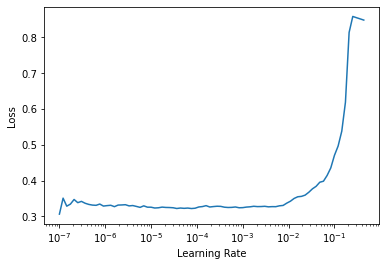

In [41]:
learn.lr_find()

In [230]:
for r in list(splits[1])[:10]:
    row, clas, probs = learn.predict(df.iloc[r])
    display(pd.concat( [df.iloc[r][['Stock code','trend']], pd.Series(probs.cpu().detach().numpy())], axis =0))

Stock code     KIWB.OB
trend             True
0             0.999943
1             0.000057
dtype: object

Stock code         REX
trend            False
0             0.002514
1             0.997486
dtype: object

Stock code         IJJ
trend             True
0             0.000486
1             0.999514
dtype: object

Stock code       SLI.V
trend             True
0             0.493913
1             0.506087
dtype: object

Stock code        TIVO
trend            False
0             0.999999
1             0.000001
dtype: object

Stock code    GNCGY.PK
trend            False
0              0.50784
1              0.49216
dtype: object

Stock code        PJR
trend           False
0             0.50784
1             0.49216
dtype: object

Stock code         SGL
trend             True
0             0.999606
1             0.000394
dtype: object

Stock code        HANS
trend            False
0             0.234643
1             0.765357
dtype: object

Stock code        STLD
trend            False
0             0.016886
1             0.983114
dtype: object

In [282]:
learn.save('model_90_0216')

Path('models/model_90_0216.pth')